In [23]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import matplotlib_inline

In [24]:
def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.figure(figsize = figsize)

def set_axes(axes: plt.Axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()
#查看是否为单一维度
def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim ==1) or (isinstance(X, list) and not hasattr(X[0], "__len__"))
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale="linear", yscale="linear", fmts=("-", "m--", "g-", "r:"), figsize=(3.5, 2.5), axes: plt.Axes=None):
#设置图例
    if legend is None:
        legend = []
#设置图像大小
    set_figsize(figsize)
#设置边框
    if axes is None:
        axes = plt.gca()
#查看是否为单一维度于X轴，是则将其list化
    if has_one_axis(X):
        X = [X]
#查看Y轴
    if Y is None:
        Y = X #没有任何轴则按照f(x) = x处理
    elif has_one_axis(Y):
        Y = [Y] #只存在一个轴则将其list化
#查看是否为维度相等
    if len(X) != len(Y):
        X = X * len(Y)
#清除axes数据
    axes.cla()
#绘图
    for x, y, fmt in zip(X, Y, fmts): #对于每一个维度而言
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    

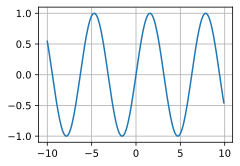

In [25]:
X = torch.arange(-10, 10, 0.1)
Y = torch.sin(X)
plot(X, Y)

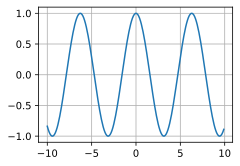

In [26]:
X.requires_grad = True
Y = torch.sin(X)
Y.sum().backward()

temp_X = X.detach().numpy()
temp_Y = X.grad.detach().numpy()

plot(temp_X, temp_Y)
